In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

%matplotlib inline
sns.set(style="whitegrid")

print("Libraries loaded.")


Libraries loaded.


## Introduction to Clustering

Clustering is a type of **unsupervised learning** used to group similar data points based on patterns or distance.

Applications include:
- Market segmentation
- Anomaly detection
- Image compression
- Social network analysis

There are several types of clustering:
- Partition based (e.g., K-Means)
- Hierarchical
- Density based (e.g., DBSCAN)
- Representative based (e.g., CURE)


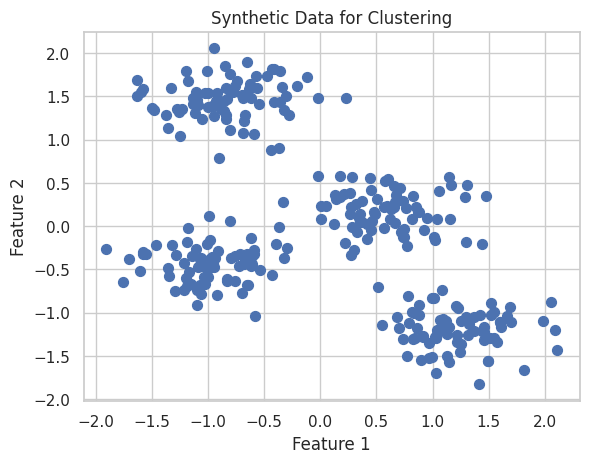

In [ ]:
# Generate synthetic dataset with blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

#normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Plot raw data
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=50)
plt.title("Synthetic Data for Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## K-Means Clustering

K-Means is a centroid based algorithm that partitions the dataset into $k$ clusters by minimizing the distance to the cluster center.

Steps:
1. Choose number of clusters $k$
2. Initialize centroids
3. Assign points to nearest centroid
4. Recalculate centroids and repeat

Limitation: K-Means assumes spherical clusters and requires $k$ to be predefined.


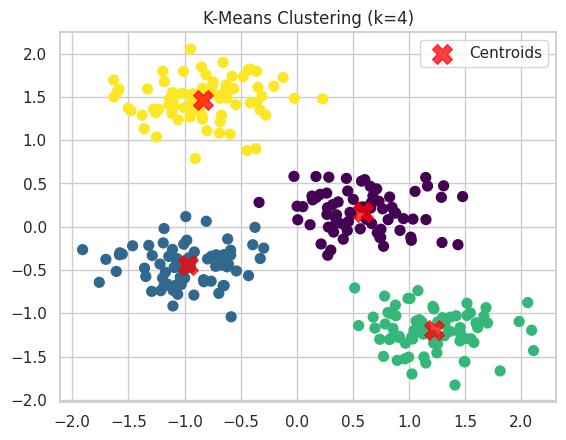

In [3]:
# Fit KMeans with k=4
kmeans = KMeans(n_clusters=4, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

# Plot clustering result
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title("K-Means Clustering (k=4)")
plt.legend()
plt.show()


## Hierarchical Clustering

Hierarchical clustering builds a tree of clusters using a bottomup approach:

- Each point starts as its own cluster
- Pairs of clusters are merged based on linkage criteria

It produces a **dendrogram** (a kind of tree diagram representing how samples are grouped) that helps visualize the merge process and choose the number of clusters. Each leaf is a sample and the branches show how groups are merging. The height indicates how different groups were before merging: the distance between then). Cutting the dendogram at certian height gives us a specific number of clusters.. 

- Each **leaf** (bottom) represents a data point.
- As you move upward, **branches** join leaves and clusters based on similarity.
- The **vertical height** of each merge indicates the **distance (or dissimilarity)** between the merged clusters.
    - Clusters that merge at a **lower height** are more similar.
    - Merges at **higher levels** mean the clusters were more dissimilar.

### Key Concept – Cutting the Dendrogram:

You can decide how many clusters to extract by drawing a **horizontal line** across the dendrogram:
- Every vertical line the horizontal cut intersects forms one final cluster.
- The lower you cut, the more clusters you get.
- The higher you cut, the fewer and broader the clusters.


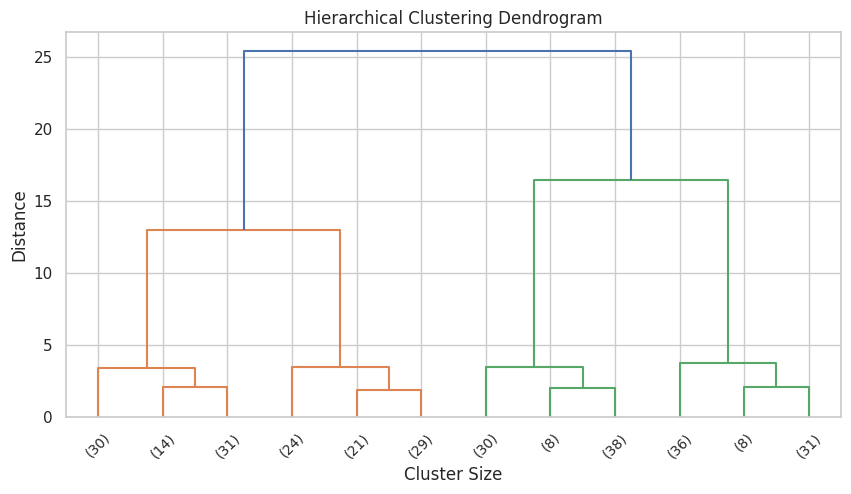

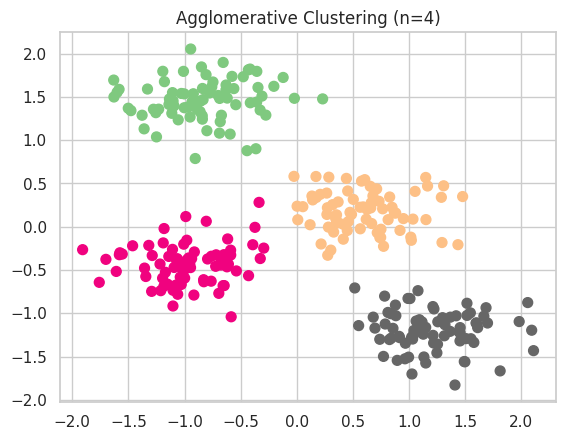

In [ ]:
# Dendrogram
linked = linkage(X_scaled, method='ward') #calculates distances between clusters. Ward minimizes the variance of clusters being merged.

plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=10.)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=4)
y_agglo = agglo.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_agglo, cmap='Accent', s=50)
plt.title("Agglomerative Clustering (n=4)")
plt.show()



## DBSCAN

**DBSCAN** groups together points that are closely packed (density-based) and marks points in low-density regions as outliers.

Advantages:
- Does not require specifying number of clusters
- Can detect clusters of arbitrary shape
- Identifies noise (outliers)

Hyperparameters:
- `eps`: neighborhood radius
- `min_samples`: minimum number of points in a neighborhood to form a cluster


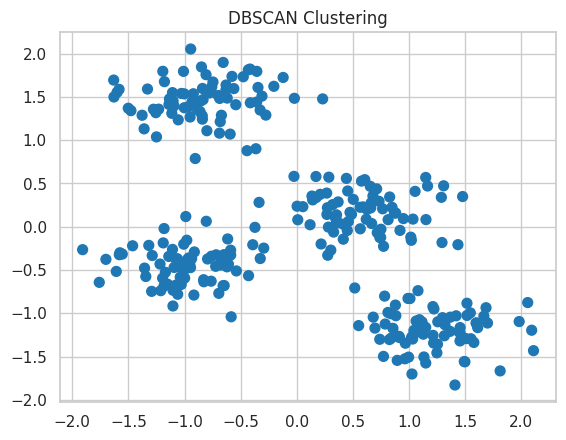

In [5]:
db = DBSCAN(eps=0.5, min_samples=5)
y_db = db.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_db, cmap='tab10', s=50)
plt.title("DBSCAN Clustering")
plt.show()


## CURE: Clustering Using Representatives (Overview)

CURE is a clustering algorithm that uses a set of representative points for each cluster instead of a single centroid.

Key characteristics:
- Handles non-spherical and variable-size clusters
- Reduces the effect of outliers
- More scalable than traditional hierarchical methods

Note: CURE is not implemented in `scikit-learn` by default.
Implementation requires external libraries or manual coding.
